# Implementando Arquitectura VGG

Se importa un repositorio en github asociado a Marcelo Becerra Rozas de RUT: 19.339.344-6 alumno del ramo de Redes Neuronales Profundas. El objetivo de esto es, para facilidad de uso de los dataSets

In [ ]:
!git clone https://github.com/imaberro/RNP-DOCTORADO.git

Cloning into 'RNP-DOCTORADO'...
remote: Enumerating objects: 1125, done.
remote: Counting objects: 100% (1125/1125), done.
remote: Compressing objects: 100% (1109/1109), done.
remote: Total 122102 (delta 8), reused 1124 (delta 8), pack-reused 120977
Receiving objects: 100% (122102/122102), 215.37 MiB | 29.91 MiB/s, done.
Resolving deltas: 100% (1116/1116), done.
Checking out files: 100% (132649/132649), done.


In [16]:

# Librerías de Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import ZeroPadding2D

from keras.callbacks import CSVLogger

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14544301689171867894
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18095837452286313450
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7218078182042197054
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8590604096116460759
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [17]:
# Inicializamos la red convolucional
classifier = Sequential()

In [18]:
#Convoluciones
classifier.add(Conv2D(32, (2, 2), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(32, (2, 1), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(32, (1, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(48, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(48, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(48, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(64, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(80, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(80, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(80, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

# Agregamos más layers convolucionales
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(96, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(96, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(96, (2, 2), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 800, activation = 'relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.00001)))
classifier.add(Dense(units = 800, activation = 'relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.00001)))
classifier.add(Dense(units = 200, activation = 'softmax'))


In [19]:
# Compilamos la red

from keras.callbacks import LearningRateScheduler
learning_rate = 1e-4
lr = 0.001
def updateLR(epoch, lr):
    if(epoch % 10 == 0 and epoch !=0):
        lr *= 0.5
        print("update",lr)
    return lr

lrate = LearningRateScheduler(updateLR)

Adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00014, amsgrad=False)
classifier.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
# Ajustamos la red a las imágenes

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/train',
                                                 target_size = (64, 64),
                                                 batch_size = 23,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/validation',
                                            target_size = (64, 64),
                                            batch_size = 23,
                                            class_mode = 'categorical')
csv_logger = CSVLogger('training.log')
history = classifier.fit_generator(training_set,
                         epochs = 30,
                         validation_data = test_set,
                         verbose=1,
                         callbacks=[lrate])


Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/30
4348/4348 [==============================] - 182s 42ms/step - loss: 4.7278 - accuracy: 0.0380 - val_loss: 4.7032 - val_accuracy: 0.0383
Epoch 2/30
4348/4348 [==============================] - 181s 42ms/step - loss: 4.6646 - accuracy: 0.0433 - val_loss: 4.6476 - val_accuracy: 0.0430
Epoch 3/30
4348/4348 [==============================] - 182s 42ms/step - loss: 4.6195 - accuracy: 0.0468 - val_loss: 4.6142 - val_accuracy: 0.0477
Epoch 4/30
4348/4348 [==============================] - 181s 42ms/step - loss: 4.5787 - accuracy: 0.0514 - val_loss: 4.5900 - val_accuracy: 0.0430
Epoch 5/30
4348/4348 [==============================] - 180s 41ms/step - loss: 4.5502 - accuracy: 0.0539 - val_loss: 4.5747 - val_accuracy: 0.0500
Epoch 6/30
4348/4348 [==============================] - 180s 41ms/step - loss: 4.5178 - accuracy: 0.0571 - val_loss: 4.5109 - val_accuracy: 0.0559
Epoch 7/30
4348/4348 [=====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


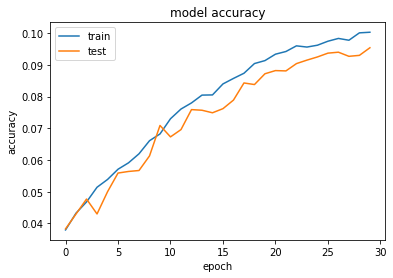

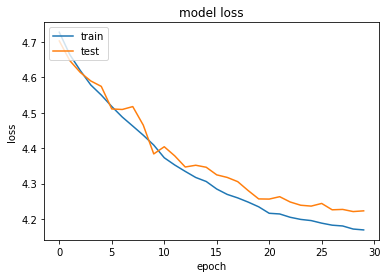

In [22]:
import matplotlib.pyplot as plt


print(history.history.keys())
# Graficamos el accuracy y el loss.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Implementando Arquitectura AlexNet



In [23]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8212589339324819945
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7071480315327225926
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17432023071828123305
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6590209513426157809
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [24]:
# Inicializamos la red convolucional
classifier = Sequential()

classifier.add(ZeroPadding2D((1,1),input_shape = (64, 64, 3)))

In [25]:
# Convoluciones
classifier.add(Conv2D(48, (5, 5), activation = 'relu'))

classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convoluciones
classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(192, (2, 2), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convoluciones
classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(192, (2, 2), activation = 'relu'))

# Convoluciones
classifier.add(ZeroPadding2D((1,1)))
classifier.add(Conv2D(128, (2, 2), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate=0.20))

classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate=0.20))

classifier.add(Dense(units = 200, activation = 'softmax'))


In [26]:
# Compilamos la red
Adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
classifier.compile(optimizer = Adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])






#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
# Ajustamos la red a las imágenes

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/train',
                                                    target_size = (64, 64),
                                                    batch_size = 256,
                                                    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/RNP-DOCTORADO/DataImages/validation',
                                            target_size = (64, 64),
                                            batch_size = 256,
                                            class_mode = 'categorical')

history = classifier.fit_generator(training_set,
                            epochs = 25,
                            validation_data = test_set,
                            verbose=1)


Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/25
391/391 [==============================] - 172s 440ms/step - loss: 5.0332 - accuracy: 0.0253 - val_loss: 4.6659 - val_accuracy: 0.0653
Epoch 2/25
391/391 [==============================] - 170s 436ms/step - loss: 4.5272 - accuracy: 0.0793 - val_loss: 4.3015 - val_accuracy: 0.1051
Epoch 3/25
391/391 [==============================] - 171s 436ms/step - loss: 4.2200 - accuracy: 0.1183 - val_loss: 4.0882 - val_accuracy: 0.1374
Epoch 4/25
391/391 [==============================] - 170s 435ms/step - loss: 3.9948 - accuracy: 0.1492 - val_loss: 4.0517 - val_accuracy: 0.1396
Epoch 5/25
391/391 [==============================] - 170s 435ms/step - loss: 3.8244 - accuracy: 0.1752 - val_loss: 3.7944 - val_accuracy: 0.1769
Epoch 6/25
391/391 [==============================] - 170s 435ms/step - loss: 3.6824 - accuracy: 0.1954 - val_loss: 3.6342 - val_accuracy: 0.2000
Epoch 7/25
391/391 [=============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


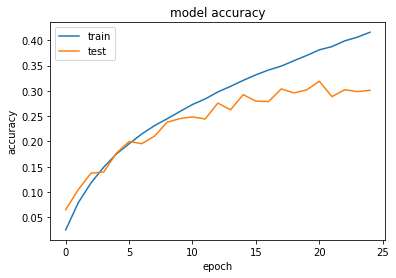

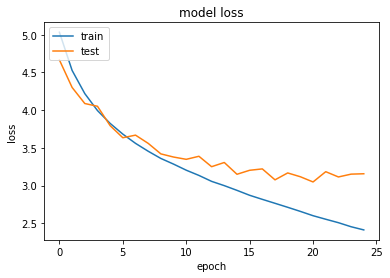

In [29]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()